 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [491]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [492]:
# Reading whale returns
file_path = Path('Resources/whale_returns.csv')
whale_df = pd.read_csv(file_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [493]:
# Sort Whale portfolio data ascending 
whale_df.sort_values("Date")
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [494]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [495]:
# Drop nulls
whale_df.dropna(inplace = True)

In [496]:
#Verify nulls dropped
whale_df.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [497]:
# Reading algorithmic returns
file_path = Path('Resources/algo_returns.csv')
algo_df = pd.read_csv(file_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [498]:
# Sort Algorothmic portfolio data ascending 
algo_df.sort_values("Date")
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [499]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [500]:
# Drop nulls
algo_df.dropna(inplace = True)

In [501]:
#Verify nulls dropped
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [502]:
# Reading S&P 500 Closing Prices
file_path = Path('Resources/sp500_history.csv')
sp500history_df = pd.read_csv(file_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
sp500history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [503]:
# Sort S&P 500 data ascending 
sp500history_df.sort_values("Date")
sp500history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [504]:
# Check Data Types
sp500history_df.dtypes

Close    object
dtype: object

In [505]:
# Fix Data Types - Remove special characters, numerical only
sp500history_df["Close"] = sp500history_df["Close"].str.replace("$", "")
sp500history_df["Close"]

C:\Users\JOSINA~1\AppData\Local\Temp/ipykernel_11596/195402373.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500history_df["Close"] = sp500history_df["Close"].str.replace("$", "")


Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: object

In [506]:
# Fix Data Types - Convert to numerical with decimal places
sp500history_df["Close"] = sp500history_df["Close"].astype('float')

In [507]:
# Verify New Data Type
sp500history_df.dtypes

Close    float64
dtype: object

In [508]:
# Calculate Daily Returns
sp500history_returns = sp500history_df.pct_change()
sp500history_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [509]:
# Drop nulls
sp500history_returns.dropna(inplace = True)

In [510]:
#Verify drop of nulls
sp500history_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [511]:
# Rename `Close` Column to be specific to this portfolio.
sp500history_returns.rename(columns = {"Close":"S&P 500"}, inplace = True)
sp500history_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [512]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_df, algo_df, sp500history_returns], axis='columns', join='outer')
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2012-10-01,NaN,NaN,NaN,NaN,NaN,NaN,-0.000872
2012-10-02,NaN,NaN,NaN,NaN,NaN,NaN,-0.003611
2012-10-03,NaN,NaN,NaN,NaN,NaN,NaN,-0.007123
2012-10-04,NaN,NaN,NaN,NaN,NaN,NaN,0.000322
2012-10-05,NaN,NaN,NaN,NaN,NaN,NaN,0.003469


In [513]:
#Analyze the data to see if any of the portfolios outperform the stock market (i.e., the S&P 500)

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Analysis

#### Calculate and Plot the daily returns.

In [514]:
# Calculate daily returns for Whale Portfolio
weights = [0.25, 0.25, 0.25, 0.25]
whale_portfolio_returns = whale_df.dot(weights)
whale_portfolio_returns.head()

Date
2015-03-03   -0.003328
2015-03-04    0.001788
2015-03-05    0.004293
2015-03-06   -0.008265
2015-03-09    0.002249
dtype: float64

<AxesSubplot:xlabel='Date'>

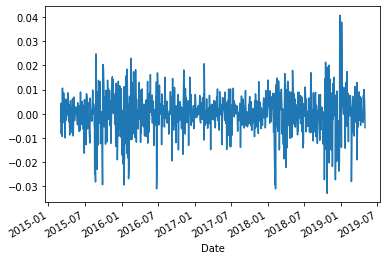

In [515]:
# Plot daily returns for Whale Portfolio
whale_portfolio_returns.plot()

In [516]:
# Calculate daily returns for Algorithmic Portfolio
weights = [0.50, 0.50]
algo_portfolio_returns = algo_df.dot(weights)
algo_portfolio_returns.head()

Date
2014-06-05    0.008674
2014-06-06    0.005070
2014-06-09    0.000328
2014-06-10    0.001835
2014-06-11    0.000499
dtype: float64

<AxesSubplot:xlabel='Date'>

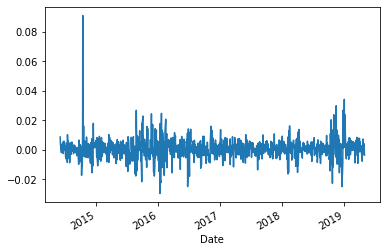

In [517]:
# Plot daily returns for Algorithmic Portfolio
algo_portfolio_returns.plot()

<AxesSubplot:xlabel='Date'>

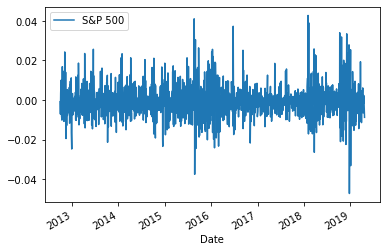

In [518]:
# Daily returns for S&P500 
sp500history_returns
sp500history_returns.plot()

#### Calculate and Plot cumulative returns.

In [519]:
# Calculate cumulative returns of Whale Portfolio
cumulative_returns_whale = (1 + whale_df).cumprod()
cumulative_returns_whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431
2015-03-04,1.000962,0.998245,0.996972,0.997617
2015-03-05,1.004981,1.002314,0.999319,1.004327
2015-03-06,0.997037,0.998731,0.990844,0.991172
2015-03-09,0.997617,1.002951,0.996633,0.989534


<AxesSubplot:title={'center':'Cumulative Returns of Whale Portfolio'}, xlabel='Date'>

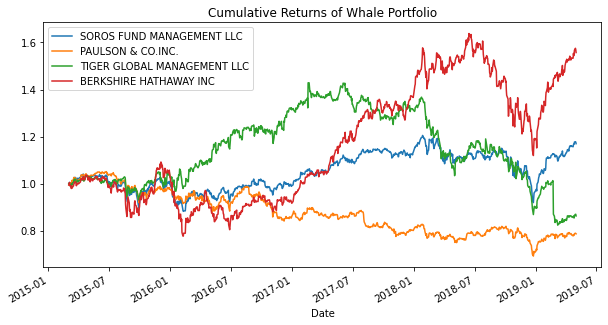

In [520]:
# Plot the cumulative returns of Whale Portfolio over the last 5 years
cumulative_returns_whale.plot(figsize=(10,5), title = ("Cumulative Returns of Whale Portfolio"))

In [521]:
# Calculate cumulative returns of Algorithmic Portfolio
cumulative_returns_algo = (1 + algo_df).cumprod()
cumulative_returns_algo.head()

,Algo 1,Algo 2
Date,,
2014-06-05,1.004062,1.013285
2014-06-06,1.005927,1.021679
2014-06-09,1.000885,1.027470
2014-06-10,1.005295,1.026714
2014-06-11,1.010081,1.022852


<AxesSubplot:title={'center':'Cumulative Returns of Algo Portfolio'}, xlabel='Date'>

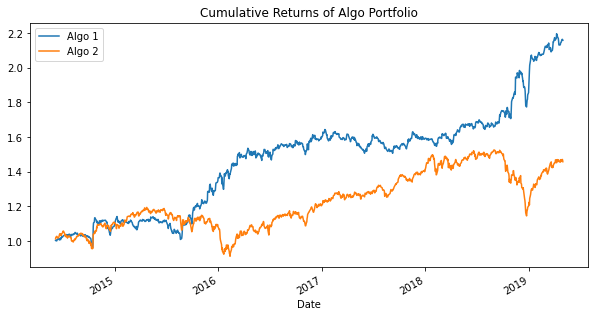

In [522]:
# Plot the cumulative returns of Algorithmic Portfolio over the last 5 years
cumulative_returns_algo.plot(figsize=(10,5), title = ("Cumulative Returns of Algo Portfolio"))

In [523]:
# Calculate cumulative returns of S&P 500
cumulative_returns_sp500 = (1 + sp500history_returns).cumprod()
cumulative_returns_sp500.head()

,S&P 500
Date,
2019-04-22,0.991236
2019-04-18,0.990234
2019-04-17,0.988673
2019-04-16,0.990926
2019-04-15,0.990422


<AxesSubplot:title={'center':'Cumulative of Returns of S&P 500'}, xlabel='Date'>

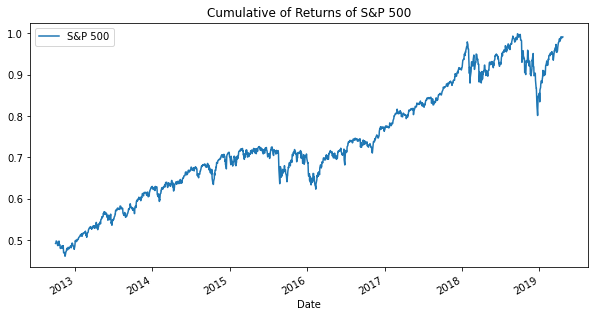

In [524]:
# Plot the cumulative returns of of S&P 500 over the last 5 years
cumulative_returns_sp500.plot(figsize=(10,5), title = ("Cumulative of Returns of S&P 500"))

## Does any portfolio outperform the S&P 500? 
  Both the porfolios outperform the S&P 500 but the Algorithmic portfolio outperforms the S&P 500 by a   wider margin.

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

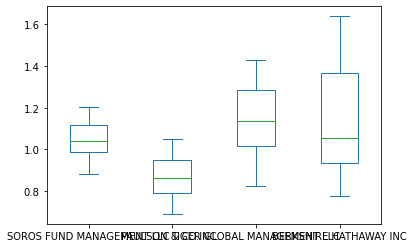

In [525]:
# Box plot to visually show risk of Whale Portfolio
cumulative_returns_whale.plot.box()

<AxesSubplot:>

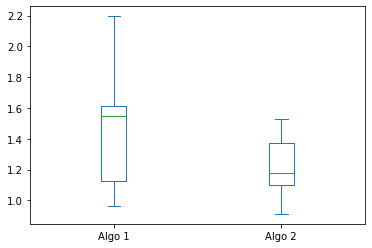

In [526]:
# Box plot to visually show risk of Algorithmic Portfolio
cumulative_returns_algo.plot.box()

<AxesSubplot:>

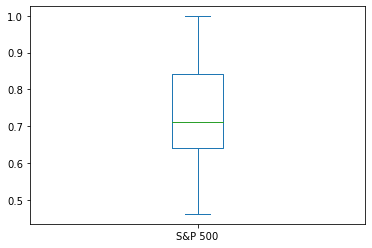

In [527]:
# Box plot to visually show risk of S&P 500
cumulative_returns_sp500.plot.box()

### Calculate Standard Deviations

In [528]:
# Calculate the daily standard deviation of Whale portfolio
whale_std = whale_df.std()
whale_std.head()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [529]:
# Calculate the daily standard deviation of Algorithmic portfolio
algo_std = algo_df.std()
algo_std.head()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [530]:
# Calculate the daily standard deviation of S&P 500
sp500history_returns_std = sp500history_returns.std()
sp500history_returns_std.head()

S&P 500    0.008135
dtype: float64

Both the Whale and Algorithmic portfolios are riskier than the S&P 500 since their std deviations are higher than the S&P 500's std deviation.

### Calculate the Annualized Standard Deviation

In [531]:
# Calculate the annualized standard deviation of Whale portfolio (252 trading days)
whale_annualized_std = whale_std * np.sqrt(252)
whale_annualized_std.head()

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

In [532]:
# Calculate the annualized standard deviation of Algorithmic portfolio (252 trading days)
algo_annualized_std = algo_std * np.sqrt(252)
algo_annualized_std.head()

Algo 1    0.126801
Algo 2    0.134401
dtype: float64

In [533]:
# Calculate the annualized standard deviation of S&P 500 (252 trading days)
sp500history_returns_annualized_std = sp500history_returns_std * np.sqrt(252)
sp500history_returns_annualized_std.head()

S&P 500    0.129133
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [534]:
# Calculate the rolling standard deviation for Whale portfolio using a 21-day window
whale_df.rolling(window=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN
...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641
2019-04-26,0.004117,0.005649,0.005424,0.006599
2019-04-29,0.004123,0.005374,0.005438,0.006584


<AxesSubplot:xlabel='Date'>

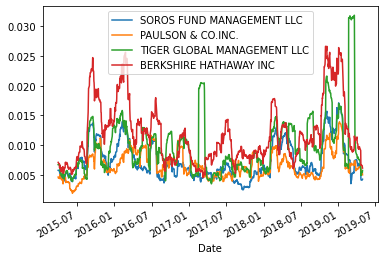

In [535]:
# Plot the rolling standard deviation for Whale
whale_df.rolling(window=21).std().plot()

In [536]:
# Calculate the rolling standard deviation for Algorithmic portfolio using a 21-day window
algo_df.rolling(window=21).std()

,Algo 1,Algo 2
Date,,
2014-06-05,NaN,NaN
2014-06-06,NaN,NaN
2014-06-09,NaN,NaN
2014-06-10,NaN,NaN
2014-06-11,NaN,NaN
...,...,...
2019-04-25,0.005801,0.005764
2019-04-26,0.005562,0.005700
2019-04-29,0.005251,0.005622


<AxesSubplot:xlabel='Date'>

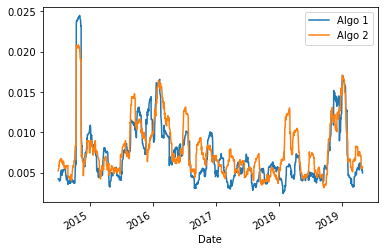

In [537]:
# Plot the rolling standard deviation for Algorithmic portfolio
algo_df.rolling(window=21).std().plot()

In [538]:
# Calculate the rolling standard deviation for S&P 500 using a 21-day window
sp500history_returns.rolling(window=21).std()

,S&P 500
Date,
2019-04-22,NaN
2019-04-18,NaN
2019-04-17,NaN
2019-04-16,NaN
2019-04-15,NaN
...,...
2012-10-05,0.009007
2012-10-04,0.007462
2012-10-03,0.007424


<AxesSubplot:xlabel='Date'>

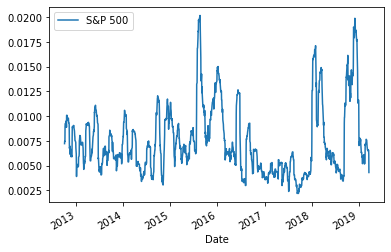

In [539]:
# Plot the rolling standard deviation for the S&P 500
sp500history_returns.rolling(window=21).std().plot()

### Calculate and plot the correlation

In [540]:
# Calculate the correlation
correlation = combined_returns.corr()

<AxesSubplot:>

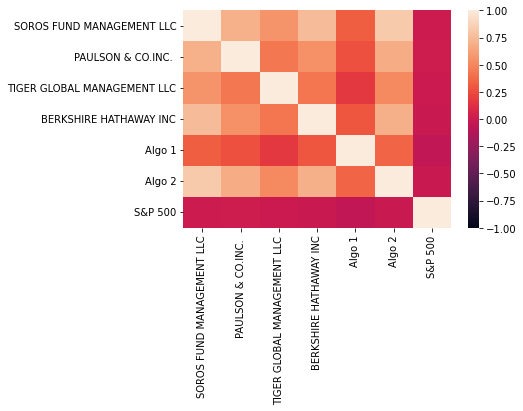

In [541]:
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [542]:
# Calculate covariance of a single portfolio
covariance_berkshire_hathaway = combined_returns['BERKSHIRE HATHAWAY INC'].cov(combined_returns['S&P 500'])             
covariance_berkshire_hathaway

-1.5371091324717376e-06

In [543]:
# Calculate variance of S&P 500
variance_sp500history_returns = combined_returns['S&P 500'].var()
variance_sp500history_returns

6.617241051948309e-05

In [544]:
# Computing beta

# Calculate 60-day rolling covariance of BERKSHIRE HATHAWAY INC vs. S&P 500
rolling_covariance_berkshire_hathaway = combined_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_returns['S&P 500'])

# Calculate 60-day rolling variance of BERKSHIRE HATHAWAY INC vs. S&P 500 
rolling_variance_berkshire_hathaway = combined_returns['S&P 500'].rolling(window=60).var()

# Calculate 60-day rolling beta of BERKSHIRE HATHAWAY INC
rolling_beta_berkshire_hathaway = rolling_covariance_berkshire_hathaway / rolling_variance_berkshire_hathaway

<AxesSubplot:title={'center':'Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC'}, xlabel='Date'>

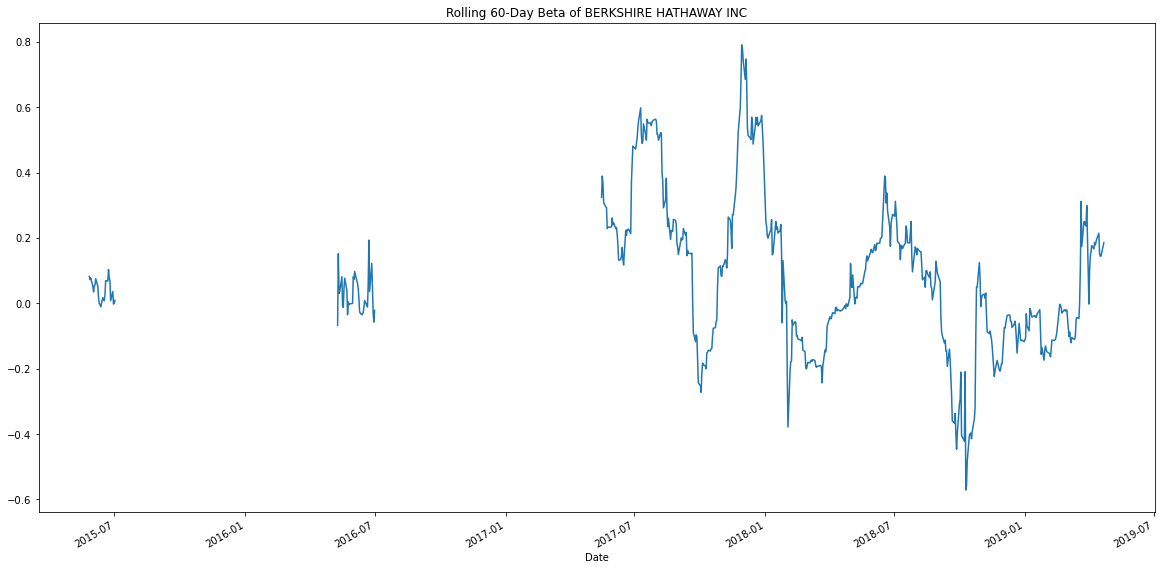

In [545]:
# Plot beta trend
rolling_beta_berkshire_hathaway.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

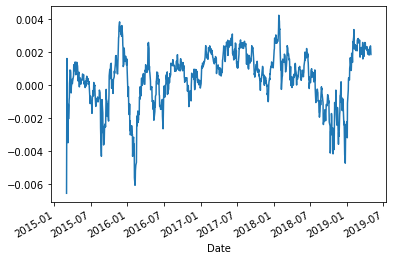

In [546]:
# Calculate the Exponentially-Weighted Moving Average (21-days Rolling Window)
combined_returns['BERKSHIRE HATHAWAY INC'].ewm(halflife=21).mean().plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [547]:
# Annualized Sharpe Ratios

sharpe_ratios = ((combined_returns.mean()-combined_returns['S&P 500'].mean()) * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      1.164876
PAULSON & CO.INC.              0.440782
TIGER GLOBAL MANAGEMENT LLC    0.463722
BERKSHIRE HATHAWAY INC         1.110597
Algo 1                         2.088826
Algo 2                         1.383313
S&P 500                        0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

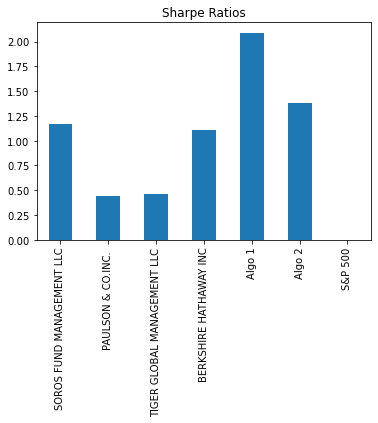

In [548]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The Algorithmic portfolio has a better reward to risk payoff than the Whale portfolio as it can be seen by its Sharpe ratio between 1.3 and 2. An analysis of its cumulative returns also shows that it outperforms both the Whale portfolio and the market (S&P 500).

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [549]:
# Reading NVDA historical data
file_path = Path('Resources/NVDA.csv')
nvda_df = pd.read_csv(file_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
nvda_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-10-01,3.3500,3.3700,3.2675,3.2800,3.012529,50423600
2012-10-02,3.3025,3.3025,3.2550,3.2925,3.024010,29549200
2012-10-03,3.3000,3.3100,3.2425,3.2600,2.994160,43087200
2012-10-04,3.2675,3.4250,3.2500,3.4050,3.127336,50260800
2012-10-05,3.4150,3.4500,3.3125,3.3250,3.053859,48306800


In [550]:
# Sort NVDA data ascending 
nvda_df.sort_values("Date")
nvda_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-10-01,3.3500,3.3700,3.2675,3.2800,3.012529,50423600
2012-10-02,3.3025,3.3025,3.2550,3.2925,3.024010,29549200
2012-10-03,3.3000,3.3100,3.2425,3.2600,2.994160,43087200
2012-10-04,3.2675,3.4250,3.2500,3.4050,3.127336,50260800
2012-10-05,3.4150,3.4500,3.3125,3.3250,3.053859,48306800


In [551]:
# Eliminate extra columns to keep only Adj Close
nvda_df = nvda_df.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
nvda_df.head()

,Adj Close
Date,
2012-10-01,3.012529
2012-10-02,3.024010
2012-10-03,2.994160
2012-10-04,3.127336
2012-10-05,3.053859


In [552]:
# Reading TTD historical data
file_path = Path('Resources/TTD.csv')
ttd_df = pd.read_csv(file_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
ttd_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-22,3.100,3.1700,2.841,2.890,2.890,22728000
2016-09-23,2.885,2.8900,2.684,2.766,2.766,10587000
2016-09-26,2.710,2.8420,2.700,2.777,2.777,3061000
2016-09-27,2.833,3.0848,2.734,2.998,2.998,10158000
2016-09-28,3.073,3.3400,3.002,3.339,3.339,20565000


In [553]:
# Sort TTD data ascending 
ttd_df.sort_values("Date")
ttd_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-22,3.100,3.1700,2.841,2.890,2.890,22728000
2016-09-23,2.885,2.8900,2.684,2.766,2.766,10587000
2016-09-26,2.710,2.8420,2.700,2.777,2.777,3061000
2016-09-27,2.833,3.0848,2.734,2.998,2.998,10158000
2016-09-28,3.073,3.3400,3.002,3.339,3.339,20565000


In [554]:
# Eliminate extra columns to keep only Adj Close
ttd_df = ttd_df.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
ttd_df.head()

,Adj Close
Date,
2016-09-22,2.890
2016-09-23,2.766
2016-09-26,2.777
2016-09-27,2.998
2016-09-28,3.339


In [555]:
# Reading AMD historical data
file_path = Path('Resources/AMD.csv')
amd_df = pd.read_csv(file_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
amd_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-10-01,3.39,3.41,3.26,3.28,3.28,25050500
2012-10-02,3.30,3.41,3.17,3.27,3.27,27052700
2012-10-03,3.28,3.29,3.10,3.12,3.12,27800700
2012-10-04,3.17,3.25,3.09,3.22,3.22,23236300
2012-10-05,3.24,3.28,3.17,3.22,3.22,11215000


In [556]:
# Sort AMD data ascending 
amd_df.sort_values("Date")
amd_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-10-01,3.39,3.41,3.26,3.28,3.28,25050500
2012-10-02,3.30,3.41,3.17,3.27,3.27,27052700
2012-10-03,3.28,3.29,3.10,3.12,3.12,27800700
2012-10-04,3.17,3.25,3.09,3.22,3.22,23236300
2012-10-05,3.24,3.28,3.17,3.22,3.22,11215000


In [557]:
# Eliminate extra columns to keep only Adj Close
amd_df = amd_df.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
amd_df.head()

,Adj Close
Date,
2012-10-01,3.28
2012-10-02,3.27
2012-10-03,3.12
2012-10-04,3.22
2012-10-05,3.22


In [558]:
# Combine all stocks in a single DataFrame
my_portfolio = pd.concat([nvda_df, ttd_df, amd_df], axis='columns', join='outer')
my_portfolio.head()

,Adj Close,Adj Close,Adj Close
Date,,,
2012-10-01,3.012529,NaN,3.28
2012-10-02,3.024010,NaN,3.27
2012-10-03,2.994160,NaN,3.12
2012-10-04,3.127336,NaN,3.22
2012-10-05,3.053859,NaN,3.22


In [559]:
# Reorganize portfolio data by having a column per symbol
columns = ["NVDA", "TTD", "AMD"]
my_portfolio.columns = columns
my_portfolio.head()

,NVDA,TTD,AMD
Date,,,
2012-10-01,3.012529,NaN,3.28
2012-10-02,3.024010,NaN,3.27
2012-10-03,2.994160,NaN,3.12
2012-10-04,3.127336,NaN,3.22
2012-10-05,3.053859,NaN,3.22


In [560]:
# Reset Date index
# my_portfolio.set_index(my_portfolio['Date'], inplace=True)

In [561]:
# Calculate daily returns
my_portfolio_returns = my_portfolio.pct_change()
my_portfolio_returns.head()

,NVDA,TTD,AMD
Date,,,
2012-10-01,NaN,NaN,NaN
2012-10-02,0.003811,NaN,-0.003049
2012-10-03,-0.009871,NaN,-0.045872
2012-10-04,0.044479,NaN,0.032051
2012-10-05,-0.023495,NaN,0.000000


In [562]:
# Drop NAs and display sample data
my_portfolio_returns.dropna(inplace = True)
my_portfolio_returns.head()

,NVDA,TTD,AMD
Date,,,
2016-09-23,-0.001077,-0.042907,0.028257
2016-09-26,-0.009392,0.003977,-0.035115
2016-09-27,0.034193,0.079582,0.034810
2016-09-28,0.003607,0.113742,0.007645
2016-09-29,0.009284,-0.131776,0.012140


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [563]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return and display sample data
my_portfolio_returns = my_portfolio.dot(weights)
my_portfolio_returns.tail()

Date
2019-04-24    32.255506
2019-04-25    31.867809
2019-04-26    31.226550
2019-04-29    31.620978
2019-04-30    31.592370
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [564]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns = pd.concat([whale_df, algo_df, my_portfolio_returns, sp500history_returns], axis='columns', join='outer')
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,0,S&P 500
Date,,,,,,,,
2012-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000872
2012-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003611
2012-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007123
2012-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000322
2012-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003469


In [565]:
# Reorganize the portfolio by giving a name to my portfolio
columns = ["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC.", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "Algo 1", "Algo 2", "MY PORTFOLIO", "S&P 500"]#combined_returns.columns = columns
combined_returns.columns = columns
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,MY PORTFOLIO,S&P 500
Date,,,,,,,,
2012-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000872
2012-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003611
2012-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007123
2012-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000322
2012-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003469


In [566]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns.dropna(inplace = True)
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,MY PORTFOLIO,S&P 500
Date,,,,,,,,
2016-09-22,0.009618,0.010389,0.011368,0.008352,0.004947,0.006361,8.425608,0.005770
2016-09-23,-0.000404,0.001882,-0.003094,0.003374,-0.004112,-0.003932,8.438526,0.008662
2016-09-26,-0.003644,-0.012388,-0.004694,-0.006818,0.003193,-0.007194,8.315439,-0.006403
2016-09-27,0.004825,-0.003098,0.006833,0.003478,-0.003551,0.002122,8.643084,-0.005269
2016-09-28,0.001465,-0.002941,0.003785,0.000123,0.012062,0.006329,8.793127,0.009409


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [570]:
# Calculate the daily standard deviation of My portfolio
my_portfolio_std = my_portfolio_returns.std()
my_portfolio_std

7.207810297885336

In [571]:
# Calculate the annualized `std`
my_portfolio_annualized_std = my_portfolio_std * np.sqrt(252)
my_portfolio_annualized_std

114.42044127320992

### Calculate and plot rolling `std` with 21-day window

In [574]:
# Calculate rolling standard deviation
my_portfolio_returns.rolling(window=21).std()

Date
2012-10-01         NaN
2012-10-02         NaN
2012-10-03         NaN
2012-10-04         NaN
2012-10-05         NaN
                ...   
2019-04-24    1.012947
2019-04-25    0.933839
2019-04-26    0.753552
2019-04-29    0.559228
2019-04-30    0.424277
Length: 1654, dtype: float64

<AxesSubplot:xlabel='Date'>

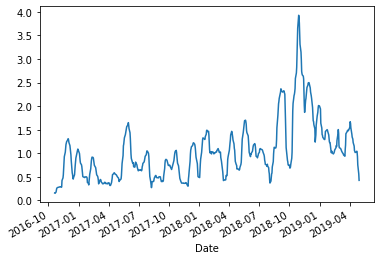

In [575]:
# Plot rolling standard deviation
my_portfolio_returns.rolling(window=21).std().plot()

### Calculate and plot the correlation

In [576]:
# Calculate the correlation
correlation = combined_returns.corr()

<AxesSubplot:>

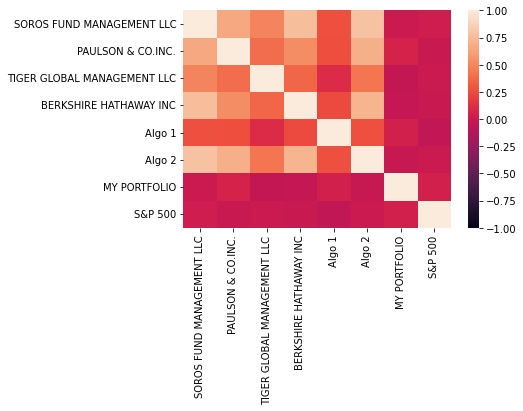

In [577]:
#Plot the correlation
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [578]:
# Calculate covariance of My Portfolio
covariance_my_portfolio = combined_returns['MY PORTFOLIO'].cov(combined_returns['S&P 500'])             
covariance_my_portfolio

0.00259984291511035

In [579]:
# Computing beta

# Calculate 60-day rolling covariance of BERKSHIRE HATHAWAY INC vs. S&P 500
rolling_covariance_my_portfolio = combined_returns['MY PORTFOLIO'].rolling(window=60).cov(combined_returns['S&P 500'])

# Calculate 60-day rolling variance of BERKSHIRE HATHAWAY INC vs. S&P 500 
rolling_variance_my_portfolio = combined_returns['S&P 500'].rolling(window=60).var()

# Calculate 60-day rolling beta of BERKSHIRE HATHAWAY INC
rolling_beta_my_portfolio = rolling_covariance_my_portfolio / rolling_variance_my_portfolio

<AxesSubplot:title={'center':'Rolling 60-Day Beta of MY PORTFOLIO'}, xlabel='Date'>

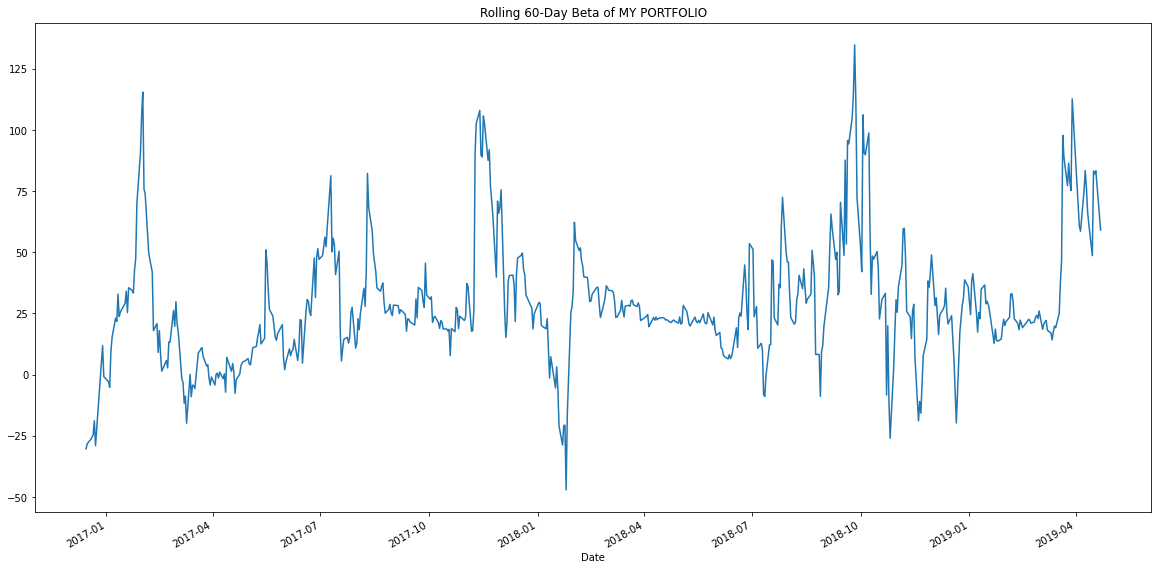

In [580]:
# Plot beta trend
rolling_beta_my_portfolio.plot(figsize=(20, 10), title='Rolling 60-Day Beta of MY PORTFOLIO')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [581]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = ((combined_returns.mean()-combined_returns['S&P 500'].mean()) * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC       1.390273
PAULSON & CO.INC.               0.317557
TIGER GLOBAL MANAGEMENT LLC    -0.081425
BERKSHIRE HATHAWAY INC          1.645165
Algo 1                          2.227006
Algo 2                          1.692286
MY PORTFOLIO                   48.915958
S&P 500                         0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio of My Porfolio'}>

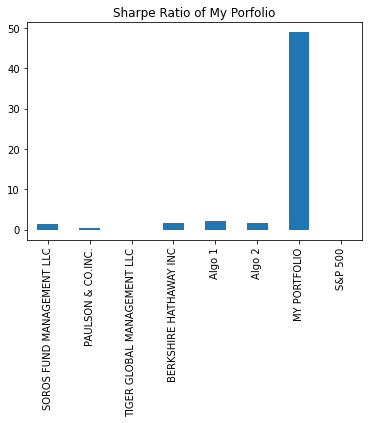

In [582]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratio of My Porfolio")

### How does your portfolio do?

My Portfolio does very well as it has a better reward to risk payoff than the Whale portfolio and Algorithmic portofolios. With a Sharpe ratio of 48, it is well above the 2 that the Algorithmic portfolio yielded. An analysis of its daily and cumulative returns also shows that it outperforms both the Whale portfolio, the Algorithmic portfolio and the market (S&P 500).